In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

COLLECTING THE DATA 

In [3]:
df= pd.read_csv(r'C:\Users\kaohs\Desktop\Ironhack 2024\Labs\lab-customer-analysis-final-round\files_for_lab\csv_files\marketing_customer_analysis.csv',sep =',')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


STANDARIZE THE DATA

In [4]:
df1=df.copy()
df1.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [5]:
df1.columns = df1.columns.str.lower()
df1.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

CHECK THE NULL VALUES

In [6]:
df1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [7]:
df1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [8]:
categorical_columns = df1.select_dtypes(include=['object']).columns
unique_counts = df1[categorical_columns].nunique()
unique_counts

customer             9134
state                   5
response                2
coverage                3
education               5
effective to date      59
employmentstatus        5
gender                  2
location code           3
marital status          3
policy type             3
policy                  9
renew offer type        4
sales channel           4
vehicle class           6
vehicle size            3
dtype: int64

In [9]:
df1["policy"].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

EXPLANATORY ANALYSIS

In [10]:
df1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


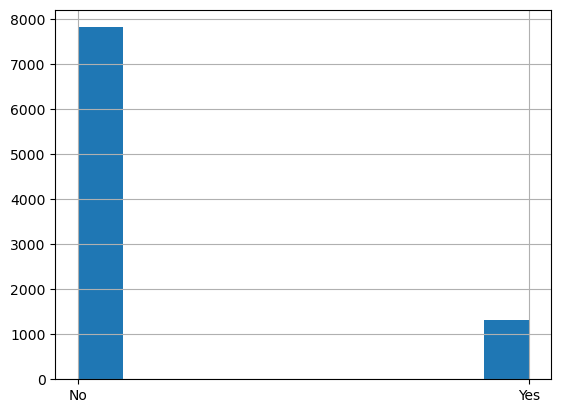

In [11]:
df1["response"].hist()
plt.show()


<Axes: xlabel='response', ylabel='count'>

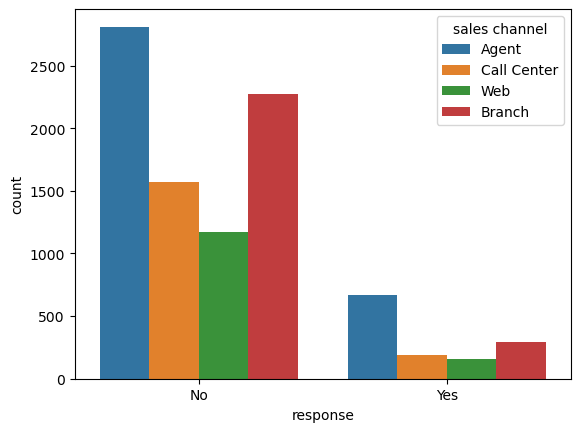

In [12]:
sns.countplot(x='response', hue='sales channel', data=df1)

In [13]:
numerical= df1.select_dtypes(include=[np.number])
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


ANALYSIS 

In [14]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [15]:
correlations_matrix["total claim amount"].sort_values(ascending=False)

total claim amount               1.000000
monthly premium auto             0.632017
customer lifetime value          0.226451
months since last claim          0.007563
months since policy inception    0.003335
number of policies              -0.002354
number of open complaints       -0.014241
income                          -0.355254
Name: total claim amount, dtype: float64

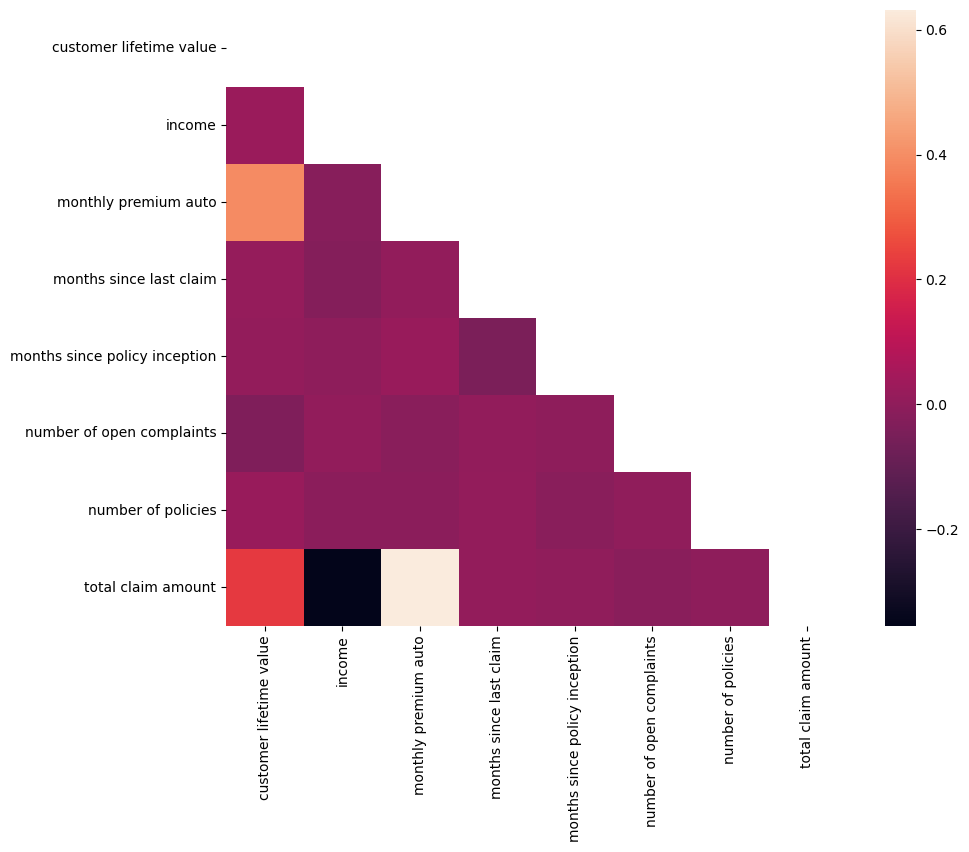

In [16]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings

In [18]:
df1=pd.get_dummies(df1,drop_first=True)

In [19]:
X = df1.drop(['total claim amount'], axis=1)
y = df1['total claim amount']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
y_train

434      624.000000
4641     628.800000
4952     667.200000
1489     871.200000
812      141.799422
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total claim amount, Length: 6393, dtype: float64

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.44075639,  0.3585765 ,  1.06046104, ..., -0.50912493,
         0.64834484, -0.48931982],
       [-0.42076609, -0.35910914,  1.08940703, ..., -0.50912493,
        -1.54238908,  2.04365316],
       [-0.45714775, -0.8215184 ,  1.32097496, ..., -0.50912493,
         0.64834484, -0.48931982],
       ...,
       [ 0.15136296, -1.24842389,  1.03151505, ..., -0.50912493,
         0.64834484, -0.48931982],
       [ 0.99131495, -1.24842389,  1.32097496, ..., -0.50912493,
         0.64834484, -0.48931982],
       [-0.6886586 ,  1.33550913, -0.27105455, ..., -0.50912493,
         0.64834484, -0.48931982]])

In [26]:
X_test_scaled 

array([[-0.55870753,  1.21946839,  0.36575725, ..., -0.50912493,
         0.64834484, -0.48931982],
       [-0.36642688, -0.4801793 , -0.64735244, ...,  1.96415446,
         0.64834484, -0.48931982],
       [-0.62041016,  1.89175686,  0.01840536, ...,  1.96415446,
        -1.54238908,  2.04365316],
       ...,
       [-0.3652092 ,  1.58423402,  1.23413699, ..., -0.50912493,
         0.64834484, -0.48931982],
       [-0.42907561, -1.24842389, -0.64735244, ...,  1.96415446,
        -1.54238908, -0.48931982],
       [ 3.15851312, -0.08053858,  0.94467708, ..., -0.50912493,
         0.64834484, -0.48931982]])

Train the model 

In [31]:
lm = LinearRegression()
lm.fit(X,y)
lm.coef_

array([-4.64926275e-04, -2.55809596e-04,  5.55843168e+00, ...,
        1.42037117e+00, -1.54467281e+00, -6.98104499e-01])

In [32]:
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)
print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 1.0
RMSE: 1.0269367860814076e-08
MAE: 7.0349548727614035e-09


In [34]:
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
lm.coef_

array([  7.81560776, -21.96343319,  64.56167212, ...,  -7.75111623,
        -0.86528356,   3.34729096])

In [35]:
predictions = lm.predict(X_test_scaled)

In [36]:
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.59
RMSE: 183.13290171958982
MAE: 128.02876138129966


An R2 score of 0.59 indicates that the model explains approximately 59% of the variance in the target variable. This suggests a moderate level of fit, where the model captures some but not all of the underlying patterns in the data.
RMSE (Root Mean Squared Error):

With an RMSE of 183.13, the average prediction error of the model is approximately 183.13 units. This metric provides a measure of the typical magnitude of errors between predicted and actual values.
MAE (Mean Absolute Error):

Conclusion: The MAE of 128.03 signifies that, on average, the absolute difference between the model's predictions and the actual values is about 128.03 units. MAE gives a straightforward assessment of prediction accuracy without considering the direction of errors.

These conclusions collectively describe the model's performance in terms of explaining variance, predicting errors, and providing a measure of average prediction accuracy. They indicate that while the model has moderate explanatory power, it still exhibits significant prediction errors that could be addressed through further model refinement or data enhancement.

IMPROVING THE MODEL


<Axes: xlabel='total claim amount'>

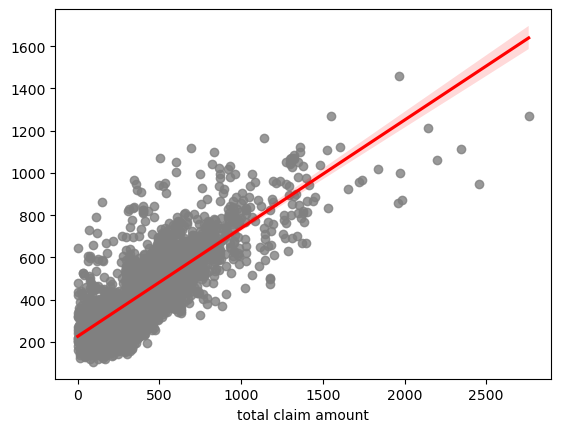

In [37]:
sns.regplot(x=y_test, y=predictions, line_kws={"color": "red"}, scatter_kws={"color": "grey"})

In [39]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)
y_train_scaled

434     6.436150
4641    6.443813
4952    6.503090
1489    6.769872
812     4.954414
          ...   
5734    5.731143
5191    5.859075
5390    6.965621
860     6.503090
7270    5.840686
Name: total claim amount, Length: 6393, dtype: float64

In [40]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.49
RMSE: 183.13290171958982
MAE: 128.02876138129966


The model as been slightly improved as we can see that the R2 score has decrease howerver the size of the error still remains very high for the RMSE and MAE and definitely needs improvement. 